+-----------+
| Analyzing |
+-----------+

- Analyzing load combination LC1
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matrix
- Adding plate stiffness terms to global stiffness matrix
- Checking nodal stability
- Calculating global displacement vector
- Checking for tension/compression-only support spring convergence
- Checking for tension/compression-only spring convergence
- Checking for tension/compression-only member convergence
- Tension/compression-only analysis converged after 1 iteration(s)

- Analyzing load combination LC2
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matri

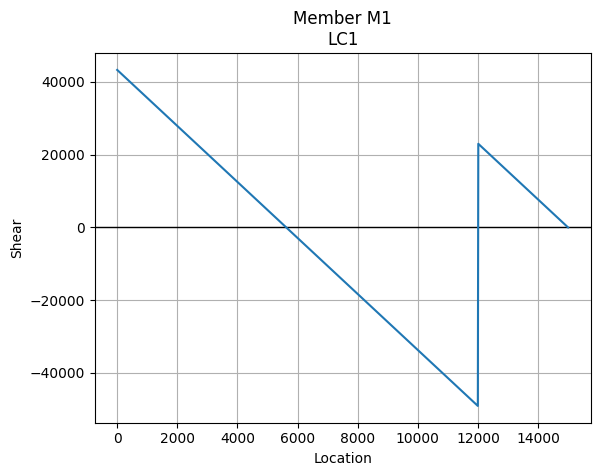

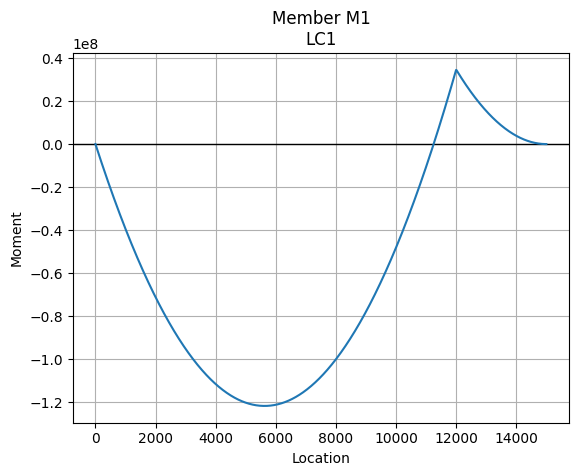

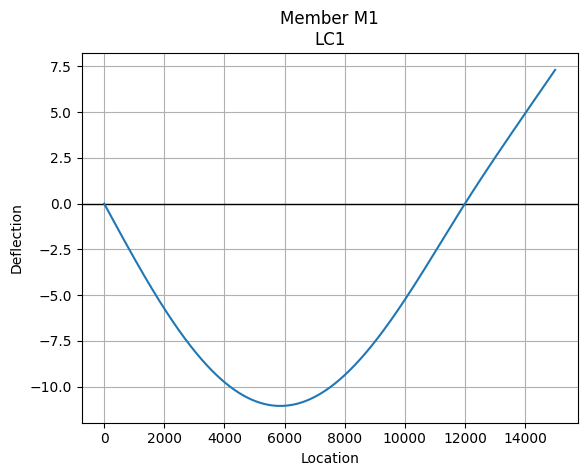

{'LC1': 43312.5, 'LC2': 116559.37500000003}
{'LC1': 72187.49999999993, 'LC2': 207965.6250000001}


In [1]:
### Alan FE Model
from PyNite import FEModel3D
from PyNite.Visualization import render_model

beam_model = FEModel3D() # Creates an empty model

beam_model.add_node("node1",0,0,0)
beam_model.add_node("node2",12000,0,0)
beam_model.add_node("node3",15000,0,0)
beam_model.add_material(name='Steel', E=200e3, G=77e3, nu=0.3, rho=7.7e-6)
beam_model.add_member('M1', 'node1', 'node3', 'Steel', 100e6, 800e6, 100e3, 2000)

beam_model.def_support('node1', support_DX=True, support_DY=True, support_DZ=True, support_RX=True)
beam_model.def_support('node2', support_DY=True)

beam_model.add_load_combo('LC1',{"D":1.4})
beam_model.add_load_combo('LC2',{"D":1.25, "L":1.5})

beam_model.add_member_pt_load("M1", "Fy", -15000, x = 4000, case="L")
beam_model.add_member_dist_load("M1","Fy", -7.8, -7.8, 0, 12000, case = "L")
beam_model.add_member_dist_load("M1","Fy", -13, -13, 12000, 15000, case = "L")
beam_model.add_member_dist_load("M1","Fy", -5.5, -5.5, 0, 15000, case = "D")

beam_model.analyze(log = True, check_statics=True)

#render_model(beam_model, combo_name="LC2", annotation_size=300)

beam_model.Members['M1'].plot_shear("Fy", combo_name="LC1", n_points= 1000)
beam_model.Members['M1'].plot_moment("Mz", combo_name="LC1", n_points= 1000)
beam_model.Members['M1'].plot_deflection('dy',combo_name='LC1',n_points = 1000)

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)